In [3]:
# show performance of methods under different bandwidths
import matplotlib.pyplot as plt

bws = [125, 250, 500, 1000]
bws = list(map(lambda x: str(x), bws))

throughputs = {
    'FlowSpec': (
        [8.76, 9.13, 9.35, 9.44],
        '^',
        '#1f77b4'
    ),
    'Chunk-PP': (
        [6.46, 6.72, 6.81, 6.86],
        'o',
        '#ff7f0e',
    ),
    'PipeDec': (
        [6.90, 7.17, 7.27, 7.33],
        's',
        '#2ca02c',
    ),
    'Mega-LM': (
        [1.0, 1.59, 2.00, 2.25],
        'x',
        '#d62728',
    ),
    'Galaxy': (
        [0.59, 1.22, 1.79, 2.34],
        'v',
        '#9467bd',
    ),
}

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

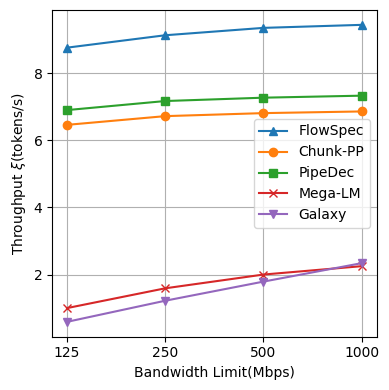

In [ ]:
methods = throughputs.keys()

# plt.rcParams['font.sans-serif'] = ['Arial']

plt.figure(figsize=(4, 4))
for method, data in throughputs.items():
    ys, marker, color = data
    plt.plot(bws, ys, label=method, marker=marker, color=color)

plt.xlabel('Bandwidth Limit(Mbps)')
plt.ylabel('Throughput $\\xi$(tokens/s)')
plt.grid()
plt.legend(
    # ncol=len(methods)//2,
)
plt.tight_layout()
plt.savefig('plot_latency.pdf', bbox_inches='tight')
plt.show()
